

# K-means Clustering



## Objectives

We will be able to:

* Use scikit-learn's k-means clustering to cluster data
* Apply k-means clustering on a real world data for Customer segmentation


### Install libraries
Ensure the required libraries are available.


In [3]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install plotly

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
import plotly.express as px

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

<h1 id="customer_segmentation_K_means">Customer Segmentation with k-means</h1>


### Load data from CSV file  
Let's use pandas to read the dataset from the cloud storage.


In [16]:
cust_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv")
cust_df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9


<h2 id="pre_processing">Pre-processing</h2


As you can see, `Address` in this dataset is a categorical variable. The k-means algorithm doesn't work directly with categorical variables because the Euclidean distance function isn't meaningful for them. You could one-hot encode the categorical feature, but for illustration purposes let's run k-means clustering without it.


In [17]:
cust_df = cust_df.drop('Address', axis=1)

In [18]:
# Drop NaNs from the dataframe
cust_df = cust_df.dropna()
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      700 non-null    int64  
 1   Age              700 non-null    int64  
 2   Edu              700 non-null    int64  
 3   Years Employed   700 non-null    int64  
 4   Income           700 non-null    int64  
 5   Card Debt        700 non-null    float64
 6   Other Debt       700 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 54.7 KB


After dropping NaNs we still have 700 rows out of the original 849. Let's proceed with this smaller data set.


#### Normalizing over the standard deviation
Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally, tranforming the features so they have zero mean and standard deviation of one. We use `StandardScaler()` to normalize, or standardize our dataset.


In [19]:
X = cust_df.values[:,1:] # leaves out `Customer ID`
Clus_dataSet = StandardScaler().fit_transform(X)

<h2 id="modeling">Modeling</h2>


Let's apply k-means to the data set. 



Write the code to cluster the data with k=3. Extract the cluster labels for this clustering process.


In [20]:
# your code here.
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_

<h2 id="insights">Insights</h2>

We assign the k-means cluster labels to each row in the dataframe.


In [27]:
cust_df["Clus_km"] = labels

We can easily check the centroid values by averaging the features in each cluster. These values indicate the central point of the cluster from the vantage point of the field in question.


In [29]:
cust_df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,439.80226,32.775895,1.632768,6.169492,30.642185,1.003795,2.090910,0.284369,10.146893
1,374.00000,44.785714,3.000000,17.857143,219.714286,6.115429,11.546357,0.285714,8.064286
2,403.56129,41.103226,1.916129,15.135484,81.122581,3.024935,5.605258,0.180645,10.848387


Now, let's look at the distribution of customers based on their education, age and income. We can choose to visualise this as a 2D scatter plot with Age on the x-axis, Income on the y-axis and the marker size representing education. The scatter points will be assigned different colors based on different class labels.


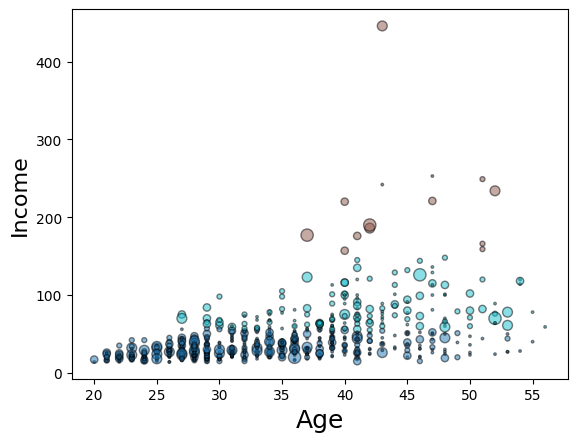

In [30]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), cmap='tab10', ec='k',alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

We can also see this distribution in 3 dimensions for better understanding. Here, the education parameter will represent the third axis instead of the marker size. 


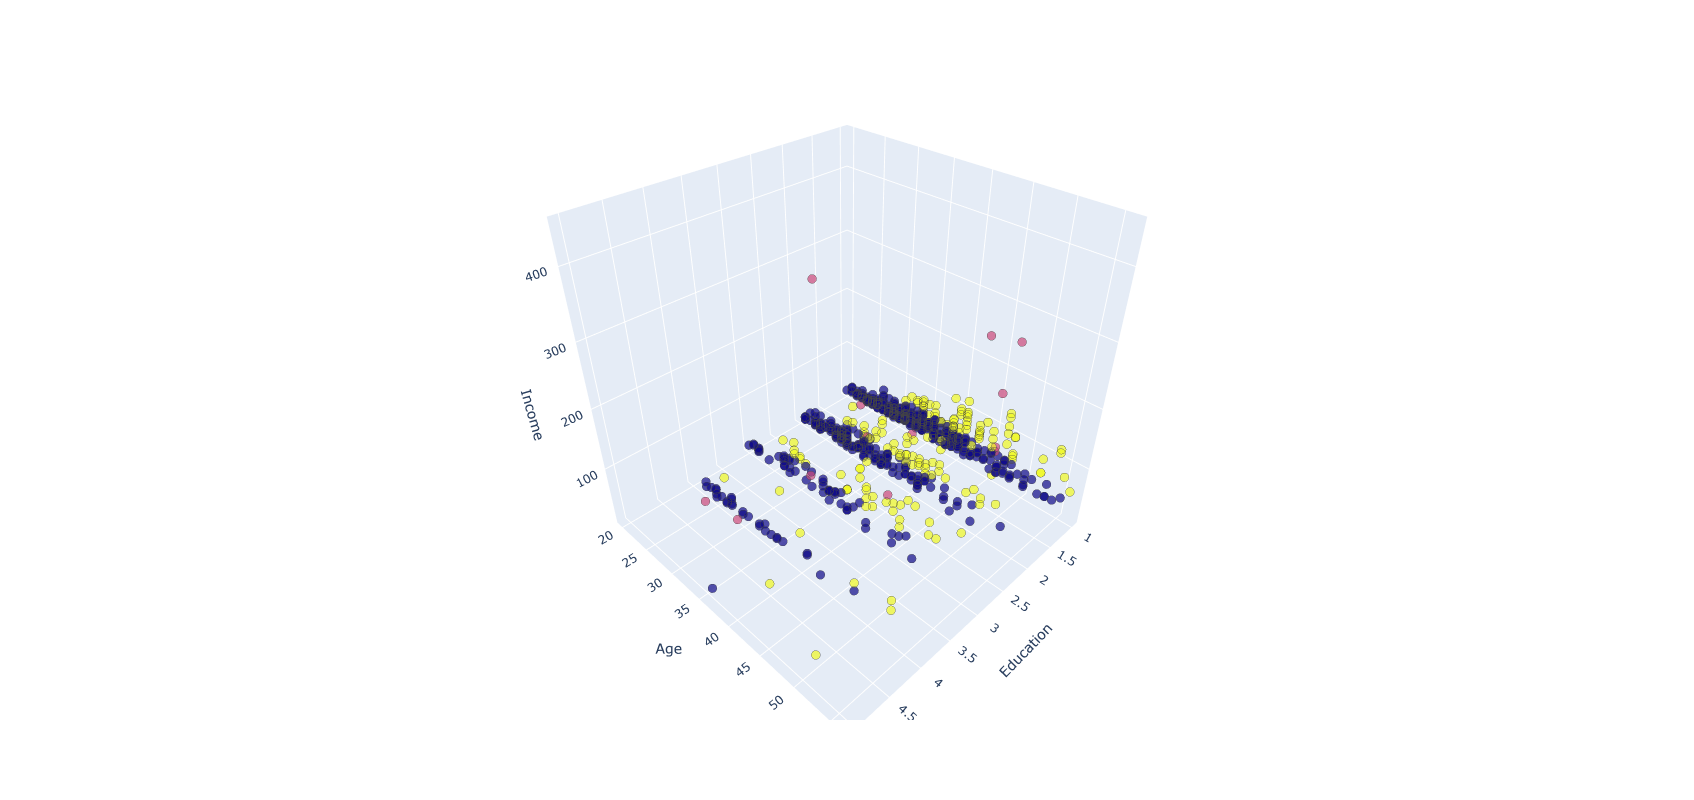

In [34]:
# Create interactive 3D scatter plot
fig = px.scatter_3d(X, x=1, y=0, z=3, opacity=0.7, color=labels.astype(float))

fig.update_traces(marker=dict(size=5, line=dict(width=.25)), showlegend=False)
fig.update_layout(coloraxis_showscale=False, width=1000, height=800, scene=dict(
        xaxis=dict(title='Education'),
        yaxis=dict(title='Age'),
        zaxis=dict(title='Income')
    ))  # Remove color bar, resize plot

fig.show()


k-means will partition your customers into mutually exclusive groups, for example, into 3 clusters. The customers in each cluster are similar to each other demographically.

Create a profile for each group, considering the common characteristics of each cluster based on your observations above. 


In [ ]:
# The 3 clusters can be:
# LATE CAREER, AFFLUENT, AND EDUCATED
# MID CAREER AND MIDDLE INCOME
# EARLY CAREER AND LOW INCOME
